In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from data import *
from agent import SupplyChain

In [2]:
def get_report_df(report):
    df = pd.DataFrame.from_dict(report, orient="index").stack().to_frame()
    # to break out the lists into columns
    df = pd.DataFrame(df[0].values.tolist(), index=df.index)
    return df

In [6]:
mask43210 = ["Source","Supplier","Manufacturer","Distributor","Retailer"] + ["Cost"]
mask432 = ["Source","Supplier","Manufacturer"] + ["Cost"]
mask321 = ["Supplier","Manufacturer","Distributor"] + ["Cost"]
mask210 = ["Manufacturer","Distributor","Retailer"] + ["Cost"]

### RL Dummy

In [7]:
sc = SupplyChain(data=data[MAIN], policy=RLDummy)
report = sc.run(5)
dfdum = get_report_df(report)

In [8]:
dfdum.T[mask321]

Supplier                                        Manufacturer            \
  received inventory policy lead orders forwarded     received inventory   
0        0        12    NaN  NaN     []         0            0        12   
1        0        12      3    2     []         0            0        12   
2        0        -3      0    0   [15]        12            0        -1   
3       15        12      2    2     []         3           12        11   
4        0        12      0    4     []         0            3        14   
5        0        12      0    4     []         0            0        -4   

                               Distributor                               \
  policy lead orders forwarded    received inventory policy lead orders   
0    NaN  NaN     []         0           0        12    NaN  NaN     []   
1      3    2     []         0           0        12      1    2     []   
2      2    0   [13]        12           0        -1      0    0   [13]   
3      0    2     []         1          12        -7      0    2   [18]   
4      2    4     []         0           1        -6      0    4     []   
5      1    4   [18]        14           0       -15      1    4    [9]   

            Cost  
  forwarded cost  
0         4   48  
1         4   37  
2        12   20  
3        12   39  
4         1   44  
5         0    0

In [14]:
dfdum.T.Cost.sum()

cost    188
dtype: object

### Passorder

In [9]:
sc = SupplyChain(data=data[MAIN], policy=PASS_ORDER)
report = sc.run()
dfpo = get_report_df(report)

In [10]:
dfpo.T[mask210].head(6)

Manufacturer                                        Distributor            \
      received inventory policy lead orders forwarded    received inventory   
0            0        12    NaN  NaN     []         0           0        12   
1            0        12      0    2     []         0           0        12   
2            0         2      0    0   [10]        10           0         2   
3           10        12      0    2     []         0          10        -3   
4            0        12      0    4     []         0           0        -3   
5            0        -3      0    4   [15]        12           0       -11   

                               Retailer                               \
  policy lead orders forwarded received inventory policy lead orders   
0    NaN  NaN     []         4        0        12    NaN  NaN     []   
1      0    2     []         4        4         1      0    2   [15]   
2      0    0   [10]        10        4        -5      0    0   [10]   
3      0    2   [15]        12       10        -3      0    2    [8]   
4      0    4     []         0       12        -5      0    4   [14]   
5      0    4    [8]         0        0       -14      0    4    [9]   

            Cost  
  forwarded cost  
0         0   48  
1        15   37  
2         5   16  
3        10   36  
4        12   40  
5         0   68

In [15]:
dfpo.T.Cost.sum()

cost    5397
dtype: object

### RL - Cha08 Paper

In [17]:
sc = SupplyChain(data=data[MAIN], policy=RLCha08)
report = sc.run()
dfcha = get_report_df(report)

In [20]:
dfcha.T.Cost.sum()

cost    4027
dtype: object

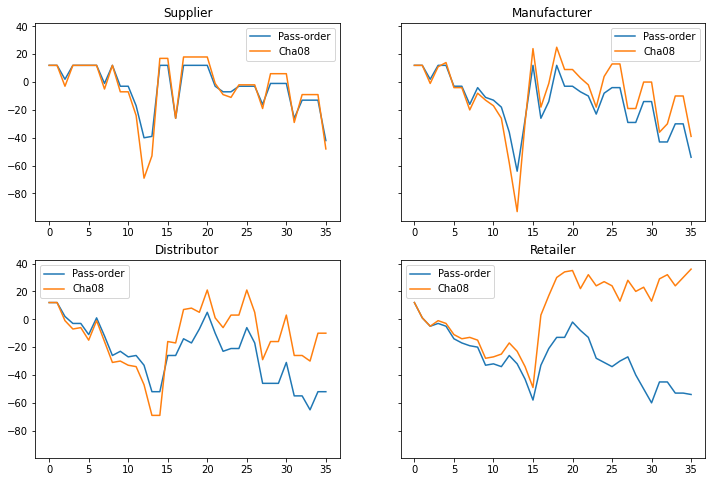

In [47]:
agents = ["Supplier", "Manufacturer", "Distributor", "Retailer"] 
fig, axes = plt.subplots(2,2, sharey=True, figsize=(12,8))

for ax, agent in zip(axes.reshape(-1), agents):
    # print (ax, agent)
    # continue
    ax.plot(dfpo.T[agent]["inventory"], label="Pass-order")
    ax.plot(dfcha.T[agent]["inventory"], label="Cha08")
    ax.set_title(agent)
    ax.legend()

Text(0.5, 1.0, 'Cumulative Costs')

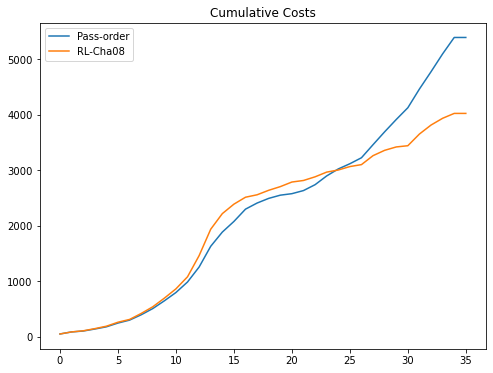

In [46]:
plt.figure(figsize=(8,6))
plt.plot(dfpo.T.Cost.cumsum(), label="Pass-order")
plt.plot(dfcha.T.Cost.cumsum(), label="RL-Cha08")
plt.legend()
plt.title("Cumulative Costs")